In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
# source : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [2]:
os.chdir(r'C:\Users\lilie\Downloads\climate_change')
df = pd.read_csv('city_temperature.csv')
df.head()

C:\Users\lilie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [4]:
df.State.value_counts()
#missing states values because it's only concerning USA

Texas                     129711
Ohio                       64855
Florida                    61341
Pennsylvania               52076
Michigan                   46325
New York                   46325
California                 46325
Indiana                    37060
Illinois                   37060
Oregon                     37060
Alabama                    37060
Georgia                    37060
Tennessee                  37060
North Carolina             37060
Colorado                   37060
Louisiana                  33593
Maryland                   27795
Washington                 27795
Kansas                     27795
Nebraska                   27795
Alaska                     27795
Missouri                   27795
Kentucky                   27795
Wisconsin                  27795
Virginia                   27795
Montana                    27794
Arizona                    26484
West Virginia              18530
Oklahoma                   18530
District of Columbia       18530
Connecticu

In [5]:
df.loc[df.State.isna()]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1450985,South/Central America & Carribean,Venezuela,NaN,Caracas,5,8,2020,80.5
1450986,South/Central America & Carribean,Venezuela,NaN,Caracas,5,9,2020,81.3
1450987,South/Central America & Carribean,Venezuela,NaN,Caracas,5,10,2020,80.2
1450988,South/Central America & Carribean,Venezuela,NaN,Caracas,5,11,2020,81.1


In [6]:
df.Year.value_counts()

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
201        351
200         89
Name: Year, dtype: int64

In [7]:
df.shape

(2906327, 8)

In [3]:
#drop year 200 & year 201
row_to_drop = df.index[(df.Year==200) | (df.Year==201)]
row_to_drop

Int64Index([  58178,   58179,   58180,   58181,   58182,   58183,   58184,
              58185,   58186,   58187,
            ...
            1212422, 1212423, 1212424, 1212425, 1212426, 1212427, 1212428,
            1212429, 1212430, 1212431],
           dtype='int64', length=440)

In [4]:
df2 = df.copy()
df2.drop(row_to_drop, axis=0, inplace=True)
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [10]:
df2.Year.value_counts()
#year is ok now

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
Name: Year, dtype: int64

In [11]:
df2.Region.value_counts()

North America                        1556652
Europe                                381695
Asia                                  316663
Africa                                251002
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [12]:
df2.Country.value_counts()

US                   1455337
Canada                 74245
Australia              46330
China                  46329
India                  37063
                      ...   
Guyana                  5065
Israel                  4641
Burundi                 4543
Georgia                 4378
Serbia-Montenegro       3427
Name: Country, Length: 125, dtype: int64

In [13]:
df2.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [14]:
df2.Month.value_counts().sort_index(ascending=True)

1     252698
2     230401
3     252689
4     244491
5     247332
6     235530
7     243287
8     243177
9     235274
10    243022
11    235061
12    242925
Name: Month, dtype: int64

In [15]:
df2.Day.value_counts().sort_index(ascending=True)

0         8
1     95649
2     95654
3     95656
4     95655
5     95653
6     95653
7     95653
8     95653
9     95653
10    95652
11    95647
12    95644
13    95616
14    95355
15    95356
16    95352
17    95352
18    95351
19    95352
20    95349
21    95349
22    95349
23    95344
24    95344
25    95343
26    95345
27    95343
28    95344
29    89367
30    87335
31    55511
Name: Day, dtype: int64

In [5]:
#drop day 0
df2.drop(df2.index[(df2.Day==0)], axis=0, inplace=True)

In [6]:
df2.Day.value_counts().sort_index(ascending=True)
#now it's ok

1     95649
2     95654
3     95656
4     95655
5     95653
6     95653
7     95653
8     95653
9     95653
10    95652
11    95647
12    95644
13    95616
14    95355
15    95356
16    95352
17    95352
18    95351
19    95352
20    95349
21    95349
22    95349
23    95344
24    95344
25    95343
26    95345
27    95343
28    95344
29    89367
30    87335
31    55511
Name: Day, dtype: int64

In [7]:
df2.AvgTemperature.value_counts().sort_index(ascending=True)

-99.0     79224
-50.0         1
-49.1         1
-47.7         1
-46.9         1
          ...  
 109.5        1
 109.7        1
 109.8        1
 109.9        4
 110.0        1
Name: AvgTemperature, Length: 1517, dtype: int64

In [ ]:
#about temperature (https://academic.udayton.edu/kissock/http/Weather/source.htm)
#The data fields in each file posted on this site are: month, day, year, average daily temperature (F).  
#We use "-99" as a no-data flag when data are not available.

# => drop -99 rows

In [7]:
df2.loc[df2.AvgTemperature==-99].Region.value_counts()

Africa                               30077
Europe                               12993
South/Central America & Carribean    12838
Asia                                 10500
North America                         8491
Middle East                           3938
Australia/South Pacific                387
Name: Region, dtype: int64

In [8]:
#drop avg temp = -99
df2.drop(df2.index[df2.AvgTemperature==-99], axis=0, inplace=True)

In [21]:
df2.AvgTemperature.value_counts().sort_index(ascending=True)
#it's ok now

-50.0     1
-49.1     1
-47.7     1
-46.9     1
-46.2     1
         ..
 109.5    1
 109.7    1
 109.8    1
 109.9    4
 110.0    1
Name: AvgTemperature, Length: 1516, dtype: int64

In [22]:
df2.shape

(2826655, 8)

In [9]:
# farenheit to celsius
#(T(°F) - 32) × 5/9
df2['AvgCelsiusTemp'] = [round((i-32)*(5/9),2) for i in df2.AvgTemperature]
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


In [10]:
df2.drop('AvgTemperature', axis=1, inplace=True)

In [25]:
df2.head()

,Region,Country,State,City,Month,Day,Year,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83


In [26]:
df2.AvgCelsiusTemp.value_counts().sort_index(ascending=True)

-45.56    1
-45.06    1
-44.28    1
-43.83    1
-43.44    1
         ..
 43.06    1
 43.17    1
 43.22    1
 43.28    4
 43.33    1
Name: AvgCelsiusTemp, Length: 1516, dtype: int64

In [27]:
df2.groupby(['Region','Year'])['AvgCelsiusTemp'].agg(['mean','min','max'])

mean   min    max
Region                            Year                        
Africa                            1995  23.272240  4.67  37.67
                                  1996  23.085922  5.06  37.50
                                  1997  23.022888  5.78  37.78
                                  1998  23.193781  7.83  39.33
                                  1999  23.274549  2.56  37.33
...                                           ...   ...    ...
South/Central America & Carribean 2016  23.121594  3.06  33.56
                                  2017  23.009442  2.67  32.83
                                  2018  22.598388  2.22  34.50
                                  2019  22.887587  2.28  34.67
                                  2020  23.342595  5.00  32.50

[182 rows x 3 columns]

In [28]:
df2.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\project4_ClimateChange\Statistically_Significant_Insights\city_temp_cleaned.csv', index = False)

In [34]:
df2.Country.unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

In [12]:
country_tokeep = ['Argentina','Australia','Brazil','Canada','China','India','Indonesia','Japan',
                  'South Korea','Mexico','Russia','Saudi Arabia','South Africa','United Kingdom','US','Turkey']
ue_country_tokeep = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Finland',
                    'France','Germany','Greece','Hungary','Ireland','Italy','Latvia','The Netherlands',
                    'Poland','Portugal','Romania','Slovakia','Spain','Sweden']

#Lithuania NOT IN DF
#Luxembourg NOT IN DF
#Slovenia NOT IN DF
#ESTONIA NOT IN DF
#Malta NOT IN DF

In [13]:
# selecting rows based on countries we'll study
df3 = df2.loc[(df2['Country'].isin(country_tokeep)) | (df2['Country'].isin(ue_country_tokeep))]

In [14]:
# selecting year from 1995 to 2018  to compare with gaz emission dataset
yr_todrop = df3.index[(df3.Year==2020) | (df3.Year==2019)]
len(yr_todrop)

106210

In [15]:
df3.drop(yr_todrop, axis=0, inplace=True)

C:\Users\lilie\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
print(df2.shape)
print(df3.shape)

(2826655, 8)
(1968123, 8)


In [17]:
df3.drop(['Month','Day'], axis=1, inplace=True)

In [18]:
df4 = df3.groupby(['City','Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()
df4

,City,Country,Region,Year,AvgCelsiusTemp
0,Abilene,US,North America,1995,17.443178
1,Abilene,US,North America,1996,17.442745
2,Abilene,US,North America,1997,16.982521
3,Abilene,US,North America,1998,19.228670
4,Abilene,US,North America,1999,18.919121
...,...,...,...,...,...
5302,Zagreb,Croatia,Europe,2014,13.456181
5303,Zagreb,Croatia,Europe,2015,13.169451
5304,Zagreb,Croatia,Europe,2016,12.684626
5305,Zagreb,Croatia,Europe,2017,13.095644


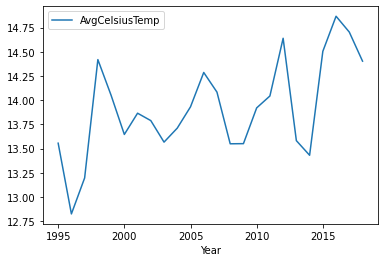

In [162]:
df4[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [19]:
df4['State'] = ["EU" if i in (ue_country_tokeep) else '' for i in df4.Country]

In [20]:
df4

,City,Country,Region,Year,AvgCelsiusTemp,State
0,Abilene,US,North America,1995,17.443178,
1,Abilene,US,North America,1996,17.442745,
2,Abilene,US,North America,1997,16.982521,
3,Abilene,US,North America,1998,19.228670,
4,Abilene,US,North America,1999,18.919121,
...,...,...,...,...,...,...
5302,Zagreb,Croatia,Europe,2014,13.456181,EU
5303,Zagreb,Croatia,Europe,2015,13.169451,EU
5304,Zagreb,Croatia,Europe,2016,12.684626,EU
5305,Zagreb,Croatia,Europe,2017,13.095644,EU


In [21]:
df4.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\city_temp_cleaned.csv', index = False)

In [113]:
df5 = df3.groupby(['Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()
df5['State'] = ["EU" if i in (ue_country_tokeep) else 'Not EU' for i in df5.Country]
df5

,Country,Region,Year,AvgCelsiusTemp,State
0,Argentina,South/Central America & Carribean,1995,16.500712,Not EU
1,Argentina,South/Central America & Carribean,1996,17.061120,Not EU
2,Argentina,South/Central America & Carribean,1997,17.302137,Not EU
3,Argentina,South/Central America & Carribean,1998,16.534056,Not EU
4,Argentina,South/Central America & Carribean,1999,16.575412,Not EU
...,...,...,...,...,...
891,United Kingdom,Europe,2014,11.860564,Not EU
892,United Kingdom,Europe,2015,11.166575,Not EU
893,United Kingdom,Europe,2016,11.235228,Not EU
894,United Kingdom,Europe,2017,11.450945,Not EU


In [115]:
df5.loc[df5.State=='Not EU']

,Country,Region,Year,AvgCelsiusTemp,State
0,Argentina,South/Central America & Carribean,1995,16.500712,Not EU
1,Argentina,South/Central America & Carribean,1996,17.061120,Not EU
2,Argentina,South/Central America & Carribean,1997,17.302137,Not EU
3,Argentina,South/Central America & Carribean,1998,16.534056,Not EU
4,Argentina,South/Central America & Carribean,1999,16.575412,Not EU
...,...,...,...,...,...
891,United Kingdom,Europe,2014,11.860564,Not EU
892,United Kingdom,Europe,2015,11.166575,Not EU
893,United Kingdom,Europe,2016,11.235228,Not EU
894,United Kingdom,Europe,2017,11.450945,Not EU


In [116]:
df5.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\country_temp_cleaned.csv', index = False)

In [ ]:
#MERGE

In [44]:
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data')
df_gaz = pd.read_csv('Gas_global.csv')
df_gaz.head()

,Unnamed: 0,Country,Date,CO2,F-Gas,N2O,State
0,0,Argentina,1995,113.81,1.22,36.72,Not EU
1,1,Argentina,1996,126.56,1.67,37.02,Not EU
2,2,Argentina,1997,127.32,2.11,37.41,Not EU
3,3,Argentina,1998,133.17,2.53,37.04,Not EU
4,4,Argentina,1999,134.19,2.95,37.32,Not EU


In [51]:
df_gaz.rename(columns={'Date': 'Year'}, inplace=True)
del df_gaz['Unnamed: 0']
df_gaz.head()

,Country,Year,CO2,F-Gas,N2O,State
0,Argentina,1995,113.81,1.22,36.72,Not EU
1,Argentina,1996,126.56,1.67,37.02,Not EU
2,Argentina,1997,127.32,2.11,37.41,Not EU
3,Argentina,1998,133.17,2.53,37.04,Not EU
4,Argentina,1999,134.19,2.95,37.32,Not EU


In [48]:
print(df5.columns)
print(df5.shape)

Index(['Country', 'Region', 'Year', 'AvgCelsiusTemp', 'State'], dtype='object')
(896, 5)


In [141]:
df_gaz['Country'] = df_gaz['Country'].replace(['Netherlands'],'The Netherlands')

In [145]:
df_gaz['Country'] = df_gaz['Country'].replace(['United States'],'US')

In [52]:
print(df_gaz.columns)
print(df_gaz.shape)

Index(['Country', 'Year', 'CO2', 'F-Gas', 'N2O', 'State'], dtype='object')
(960, 6)


In [157]:
df_merged = df5.merge(df_gaz, on=['Country','Year','State'], how='left').fillna(0)
df_merged

,Country,Region,Year,AvgCelsiusTemp,State,CO2,F-Gas,N2O
0,Argentina,South/Central America & Carribean,1995,16.500712,Not EU,113.81,1.22,36.72
1,Argentina,South/Central America & Carribean,1996,17.061120,Not EU,126.56,1.67,37.02
2,Argentina,South/Central America & Carribean,1997,17.302137,Not EU,127.32,2.11,37.41
3,Argentina,South/Central America & Carribean,1998,16.534056,Not EU,133.17,2.53,37.04
4,Argentina,South/Central America & Carribean,1999,16.575412,Not EU,134.19,2.95,37.32
...,...,...,...,...,...,...,...,...
891,United Kingdom,Europe,2014,11.860564,Not EU,414.85,16.84,28.34
892,United Kingdom,Europe,2015,11.166575,Not EU,400.37,16.76,28.46
893,United Kingdom,Europe,2016,11.235228,Not EU,378.89,16.02,28.28
894,United Kingdom,Europe,2017,11.450945,Not EU,366.38,14.91,28.28


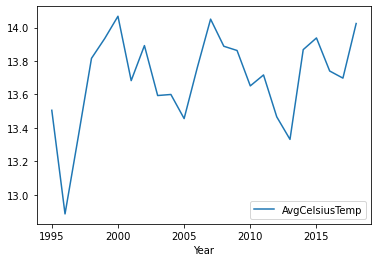

In [163]:
df_merged[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [154]:
df_merged.State.value_counts()

EU        512
Not EU    384
Name: State, dtype: int64

In [155]:
df_merged.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_merged3.csv', index = False)

In [17]:
#redoing without the selection on countries in G20

df_all = df2.copy()
df_all.drop(['Month','Day'], axis=1, inplace=True)
yr_todrop = df_all.index[df_all.Year==2020]
df_all.drop(yr_todrop, axis=0, inplace=True)
df_all = df_all.groupby(['City','Country','Region','Year'], as_index=False)[['AvgCelsiusTemp']].mean()

In [18]:
df_all.head()

,City,Country,Region,Year,AvgCelsiusTemp
0,Abidjan,Ivory Coast,Africa,1995,26.987170
1,Abidjan,Ivory Coast,Africa,1996,26.952314
2,Abidjan,Ivory Coast,Africa,1997,26.825084
3,Abidjan,Ivory Coast,Africa,1998,27.285346
4,Abidjan,Ivory Coast,Africa,1999,26.985061


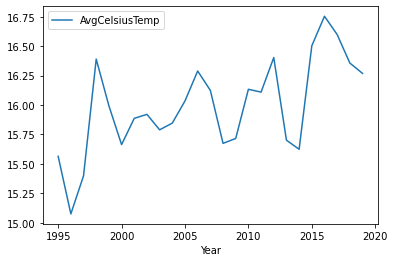

In [19]:
df_all[['Year','AvgCelsiusTemp']].groupby('Year').mean().plot()

In [20]:
df_all.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_all_temp.csv', index = False)

In [22]:
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data')

df_gaz = pd.read_csv('df_all_gaz.csv')
df_gaz.head()

,Country,Year,CO2,F-Gas,N2O
0,Afghanistan,1995,1.25,0.02,3.06
1,Afghanistan,1996,1.18,0.03,3.29
2,Afghanistan,1997,1.10,0.05,3.59
3,Afghanistan,1998,1.05,0.06,3.88
4,Afghanistan,1999,0.82,0.08,4.15


In [24]:
df_gaz['Country'] = df_gaz['Country'].replace(['Netherlands'],'The Netherlands')
df_gaz['Country'] = df_gaz['Country'].replace(['United States'],'US')

In [25]:
df_merged4 = df_all.merge(df_gaz, on=['Country','Year'], how='left').fillna(0)
df_merged4

,City,Country,Region,Year,AvgCelsiusTemp,CO2,F-Gas,N2O
0,Abidjan,Ivory Coast,Africa,1995,26.987170,0.00,0.00,0.00
1,Abidjan,Ivory Coast,Africa,1996,26.952314,0.00,0.00,0.00
2,Abidjan,Ivory Coast,Africa,1997,26.825084,0.00,0.00,0.00
3,Abidjan,Ivory Coast,Africa,1998,27.285346,0.00,0.00,0.00
4,Abidjan,Ivory Coast,Africa,1999,26.985061,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
7675,Zurich,Switzerland,Europe,2015,10.612940,39.03,1.60,2.18
7676,Zurich,Switzerland,Europe,2016,9.939475,39.61,1.53,2.19
7677,Zurich,Switzerland,Europe,2017,10.194822,38.62,1.57,2.18
7678,Zurich,Switzerland,Europe,2018,11.163139,37.48,1.62,2.14


In [26]:
df_merged4.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data\df_merged4.csv', index = False)

In [ ]:
df_mer